<a href="https://colab.research.google.com/github/amishali/Covid-19-anaylisis-/blob/master/TEAM_1_PROJECT_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESSS UNDERSTANDING




## 1.0 Project objective
Ranking  counties in Kenya on COVID -19 preparedness. 


## 1.1 Explorative Research Design

1. Load datasets
2. Investigate data quality - Check for missing values, uniformity of column naming, checking for duplicates
3. Drop null values
4. Drop duplicates
5. Drop unnecessary columns and rows
6. Merge dataframes
1. Get difference between recommended isolation beds and bed available (Create rank variable based on bed preparedness - a larger value signifies larger deficit in number of beds hence lower rank)
2. Calculate bed to population ratio
3. Rank counties based on hospital count,( a higher hospital count signifies better capacity handling hence higher rank)
4. Rank counties based on cumulative cases,( a higher number signifies a higher probability of infections hence lower rank in preparedness)
5.  Rank counties based on density [number of people per sq km],( a higher number signifies a higher probability of infections hence lower rank in preparedness)
6. Rank counties based on bed to population ratio,( a higher ratio means fewer people are assigned to one bed hence better preparedness hence higher rank)
7. Compute aggregate ranking of counties ,(Order counties by aggregate ranking)



## 1.2 Metrics for Success
 
Analysis will be deemed successful if the following are questions are answered:
- Which are the top 5 best prepared counties?
- Which are the top 5 worst prepared counties?
- Among worst prepared counties, which county has the lowest bed to population ratio?
- Which county has the lowest bed to population ratio overall?
-  Among worst prepared counties, which county has the highest density [number of people per sq km]?

# DATA UNDERSTANDING

## 2.0 DATA SOURCE



There are 4 datasets to be used in the anaylisis
 1. Population per county dataset -- availed by
  https://data.humdata.org/dataset/26801642-7088-4149-9605-6ae282897937/resource/bfe30344-5fb4-45dd-b1d1-565690aba5fc/download/2019_knbs_kenya_population_census_admins_17dec2019.xlsx

 2. Kenya health facilities -- availed by kaggle hospital list
  https://storage.googleapis.com/kaggle-forum-message-attachments/154760/5739/KEN%20Health_Facilities.csv
 
3. ICU beds per county -- availed by http://khf.co.ke/covid-19-treatment-centers/


4. Cases per county(as at 23rd July)  -- availed by 
https://www.health.go.ke/wp-content/uploads/2020/07/Kenya-COVID-19-SITREP-1
27-22-Jul-2020.pdf


## 2.1 Importing Library

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.2 Loading Datasets

In [ ]:
# Load population data
county_population = pd.read_csv('census2019populationcounty.csv')
county_population.head(5)

,COUNTY_PCODE,COUNTY_NAME,2019_POPULATION,MALE,FEMALE,TOTAL_HOUSEHOLDS,Density \n(Persons Per Sq. Km),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,KE01,Mombasa,"1,208,333","610,257","598,046","378,422","5,495",NaN,NaN,NaN,NaN,NaN,NaN
1,KE02,Kwale,"866,820","425,121","441,681","173,176",105,NaN,NaN,NaN,NaN,NaN,NaN
2,KE03,Kilifi,"1,453,787","704,089","749,673","298,472",116,NaN,NaN,NaN,NaN,NaN,NaN
3,KE04,Tana River,"315,943","158,550","157,391","68,242",8,NaN,NaN,NaN,NaN,NaN,NaN
4,KE05,Lamu,"143,920","76,103","67,813","37,963",23,NaN,NaN,NaN,NaN,NaN,NaN


## 2.3 Identification of data type

In [ ]:
# Identify datatypes in the population dataset
county_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COUNTY_PCODE                   47 non-null     object 
 1   COUNTY_NAME                    47 non-null     object 
 2   2019_POPULATION                47 non-null     object 
 3   MALE                           47 non-null     object 
 4   FEMALE                         47 non-null     object 
 5   TOTAL_HOUSEHOLDS               47 non-null     object 
 6   Density 
(Persons Per Sq. Km)  47 non-null     object 
 7   Unnamed: 7                     0 non-null      float64
 8   Unnamed: 8                     0 non-null      float64
 9   Unnamed: 9                     0 non-null      float64
 10  Unnamed: 10                    0 non-null      float64
 11  Unnamed: 11                    0 non-null      float64
 12  Unnamed: 12                    0 non-null      float

In [ ]:
# Load data on health facilities in Kenya
health_facilities = pd.read_excel('KEN Health_Facilities.csv')
health_facilities.head(5)

,Facility Number,Facility Name,HMIS,Province,District,Division,LOCATION,County,Constituency,Sub-Location,Spatial Reference Method,Facility Type,Agency,Geolocation,Facility Type NAME
0,29,KIAMBU DISTRICT HOSPITAL,251,CENTRAL,KIAMBU,KIAMBAA,KIAMBAA S/AREA,KIAMBU,GATUNDU NORTH,TOWNSHIP(KIAMBAA),GPS,1,MOH,"(-1.16938000000, 36.82993000000)","Hospital Moh and Mission Districts, sub-districts"
1,36,KIJABE HOSPITAL,252,CENTRAL,KIAMBU,LARI,KIJABE,KIAMBU,GATUNDU NORTH,KIJABE,GPS,1,MISS,"(-0.94349000000, 36.59431000000)","Hospital Moh and Mission Districts, sub-districts"
2,51,NAZARETH HOSPITAL,255,CENTRAL,KIAMBU,LIMURU,KARAMBAINI,KIAMBU,GATUNDU NORTH,KARAMBAINI,1:50000 MAPS,1,MISS,"(-1.13378000000, 36.72570000000)","Hospital Moh and Mission Districts, sub-districts"
3,62,P.C.E.A. KIKUYU HOSPITAL,2441,CENTRAL,KIAMBU,KIKUYU,KIKUYU,KIAMBU,GATUNDU NORTH,KIKUYU TOWNSHIP,DDP,1,MISS,"(-1.26667000000, 36.66670000000)","Hospital Moh and Mission Districts, sub-districts"
4,66,TIGONI SUB-DISTRICT HOSPITAL,257,CENTRAL,KIAMBU,LIMURU,TIGONI,KIAMBU,GATUNDU NORTH,ITHANJI(KIAMBU),DDP,1,MOH,"(-1.12859000000, 36.64930000000)","Hospital Moh and Mission Districts, sub-districts"


In [ ]:
# Identify datatypes in the health facility dataset
health_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Facility Number           6762 non-null   int64 
 1   Facility Name             6760 non-null   object
 2   HMIS                      6762 non-null   int64 
 3   Province                  6760 non-null   object
 4   District                  6760 non-null   object
 5   Division                  5082 non-null   object
 6   LOCATION                  5006 non-null   object
 7   County                    4855 non-null   object
 8   Constituency              4855 non-null   object
 9   Sub-Location              4982 non-null   object
 10  Spatial Reference Method  4867 non-null   object
 11  Facility Type             6762 non-null   int64 
 12  Agency                    6760 non-null   object
 13  Geolocation               6762 non-null   object
 14  Facility Type NAME      

In [ ]:
# Load data on covid 19 treatment centres
ICU_beds = pd.read_csv('KHF Data.csv')
ICU_beds.head(5)

,Cluster,County,Facility Name,Regular Isolation Beds Available,Regular Isolation Beds Recommended,Available ICU/Critical Care bed for Isolation,Recommended ICU/Critical beds for Isolation,Ventilators Available for Isoation,Ventilators Recommended for Isolation,ICU beds for General Patients(Public & Private)
0,North Rift,Elgeyo Marakwet,Iten Couty Referral Hospital,20.0,20.0,0.0,2.0,NaN,2.0,6.0
1,NaN,Nandi,Nandi Hills County Hospital,35.0,20.0,0.0,2.0,0.0,1.0,2.0
2,NaN,Tranzoia,Mt.Elgon Hospital,40.0,20.0,0.0,2.0,NaN,2.0,0.0
3,NaN,Turkana,Lodwar County Referral Hospital,12.0,20.0,0.0,2.0,NaN,2.0,3.0
4,NaN,Turkana,Lopiding Sub-County Hospital,0.0,20.0,0.0,2.0,NaN,2.0,NaN


In [ ]:
# Identify datatypes in the ICU beds dataset
ICU_beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Cluster                                          10 non-null     object 
 1   County                                           91 non-null     object 
 2   Facility Name                                    80 non-null     object 
 3   Regular Isolation Beds Available                 90 non-null     float64
 4   Regular Isolation Beds Recommended               90 non-null     float64
 5   Available ICU/Critical Care bed for Isolation    90 non-null     float64
 6   Recommended ICU/Critical beds for Isolation      90 non-null     float64
 7   Ventilators Available for Isoation               12 non-null     float64
 8   Ventilators Recommended for Isolation            74 non-null     float64
 9   ICU beds for General Patients(Publ

In [ ]:
# Load data on covid cases per county
county_cases = pd.read_csv('Cases_per_county.csv')
county_cases.head(5)

,S/N o,County,Population (2019Census KNBS),Cumulative Cases,"Cases per 100,000 population"
0,1.0,Nairobi City,"4,397,073",8618.0,196.0
1,2.0,Mombasa,"1,208,333",1870.0,154.8
2,3.0,Busia,"893,681",662.0,74.1
3,4.0,Kajiado,"1,117,840",774.0,69.2
4,5.0,Kiambu,"2,417,735",907.0,37.5


In [ ]:
# Identify datatypes in the county cases dataset
county_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S/N o                         44 non-null     float64
 1   County                        44 non-null     object 
 2   Population (2019Census KNBS)  44 non-null     object 
 3   Cumulative Cases              44 non-null     float64
 4   Cases per 100,000 population  44 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.9+ KB


# DATA PREPARATION

## 3.1  Renaming Columns

In [ ]:
#renaming columns
county_population.rename(columns = {'COUNTY_PCODE': 'County_PCODE', 'COUNTY_NAME': 'County', '2019_POPULATION': '2019_Population', 'MALE': 'Male', 'FEMALE': 'Female', 'TOTAL_HOUSEHOLDS': 'Total_Households', 'Density \n(Persons Per Sq. Km)' : 'Density'}, inplace = True)
#view 
print(county_population.columns)
county_population.head(5)

Index(['County_PCODE', 'County', '2019_Population', 'Male', 'Female',
       'Total_Households', 'Density', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


,County_PCODE,County,2019_Population,Male,Female,Total_Households,Density,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,KE01,Mombasa,"1,208,333","610,257","598,046","378,422","5,495",NaN,NaN,NaN,NaN,NaN,NaN
1,KE02,Kwale,"866,820","425,121","441,681","173,176",105,NaN,NaN,NaN,NaN,NaN,NaN
2,KE03,Kilifi,"1,453,787","704,089","749,673","298,472",116,NaN,NaN,NaN,NaN,NaN,NaN
3,KE04,Tana River,"315,943","158,550","157,391","68,242",8,NaN,NaN,NaN,NaN,NaN,NaN
4,KE05,Lamu,"143,920","76,103","67,813","37,963",23,NaN,NaN,NaN,NaN,NaN,NaN


## 3.4 Dropping Columns and Rows

In [ ]:
# Dropping columns 'County_PCODE', 'Total_households' , Unnanmed columns
to_drop = county_population.columns.to_list()[7:]
to_drop.append('County_PCODE')
to_drop.append('Total_Households')
county_population.drop(to_drop, axis = 1, inplace= True)
county_population.head(5)

,County,2019_Population,Male,Female,Density
0,Mombasa,"1,208,333","610,257","598,046","5,495"
1,Kwale,"866,820","425,121","441,681",105
2,Kilifi,"1,453,787","704,089","749,673",116
3,Tana River,"315,943","158,550","157,391",8
4,Lamu,"143,920","76,103","67,813",23


In [ ]:
# Check for duplicates
county_population.duplicated().sum()

13

In [ ]:
# Drop duplicates
county_population.dropna(inplace=True)

In [ ]:
# Dropping columns 
health_facilities.drop(['Facility Number', 'HMIS',	'Province',	'District',	'Division',	'LOCATION', 'Constituency',	'Sub-Location',	'Spatial Reference Method',	'Facility Type',	'Agency',	'Geolocation',	'Facility Type NAME'], axis = 1, inplace = True)
health_facilities.head(5)

,Facility Name,County
0,KIAMBU DISTRICT HOSPITAL,KIAMBU
1,KIJABE HOSPITAL,KIAMBU
2,NAZARETH HOSPITAL,KIAMBU
3,P.C.E.A. KIKUYU HOSPITAL,KIAMBU
4,TIGONI SUB-DISTRICT HOSPITAL,KIAMBU


In [ ]:
# Check for null values
health_facilities.isnull().sum()

Facility Name       2
County           1907
dtype: int64

In [ ]:
# Drop null values
health_facilities.dropna(inplace=True)

In [ ]:
# Check for duplicates
health_facilities.duplicated().sum()

27

In [ ]:
# Drop duplicates
health_facilities.drop_duplicates(inplace=True)

In [ ]:
# Drop Column: 'Cluster'
ICU_beds.drop('Cluster', axis = 1, inplace = True)
ICU_beds.head()

,County,Facility Name,Regular Isolation Beds Available,Regular Isolation Beds Recommended,Available ICU/Critical Care bed for Isolation,Recommended ICU/Critical beds for Isolation,Ventilators Available for Isoation,Ventilators Recommended for Isolation,ICU beds for General Patients(Public & Private)
0,Elgeyo Marakwet,Iten Couty Referral Hospital,20.0,20.0,0.0,2.0,NaN,2.0,6.0
1,Nandi,Nandi Hills County Hospital,35.0,20.0,0.0,2.0,0.0,1.0,2.0
2,Tranzoia,Mt.Elgon Hospital,40.0,20.0,0.0,2.0,NaN,2.0,0.0
3,Turkana,Lodwar County Referral Hospital,12.0,20.0,0.0,2.0,NaN,2.0,3.0
4,Turkana,Lopiding Sub-County Hospital,0.0,20.0,0.0,2.0,NaN,2.0,NaN


In [ ]:
#Drop rows with the following in the county column
ICU_beds = ICU_beds[~ICU_beds.County.isin(['Regional Subtotal','Regional Sub Total','Regional Sub-total'])]


In [ ]:
# Check for duplicates
ICU_beds.duplicated().any()

False

In [ ]:
# Drop null values in county column
ICU_beds.dropna(subset=['County'], inplace=True)

In [ ]:
# Ensure no null values in county column
ICU_beds.isnull().sum()

County                                              0
Facility Name                                       1
Regular Isolation Beds Available                    1
Regular Isolation Beds Recommended                  1
Available ICU/Critical Care bed for Isolation       1
Recommended ICU/Critical beds for Isolation         1
Ventilators Available for Isoation                 75
Ventilators Recommended for Isolation              15
ICU beds for General Patients(Public & Private)    57
dtype: int64

In [ ]:
# Drop column: 'S/N o'
county_cases.drop('S/N o', axis = 1, inplace = True)
county_cases.head(5)

,County,Population (2019Census KNBS),Cumulative Cases,"Cases per 100,000 population"
0,Nairobi City,"4,397,073",8618.0,196.0
1,Mombasa,"1,208,333",1870.0,154.8
2,Busia,"893,681",662.0,74.1
3,Kajiado,"1,117,840",774.0,69.2
4,Kiambu,"2,417,735",907.0,37.5


In [ ]:

county_cases.duplicated().sum()

0

In [ ]:
county_cases.isnull().sum()

County                          1
Population (2019Census KNBS)    1
Cumulative Cases                1
Cases per 100,000 population    1
dtype: int64

In [ ]:
county_cases.dropna(subset=['County'], inplace=True)

In [ ]:
# 44 counties with reported covid cases as of 23rd July
county_cases.shape

(44, 4)

## 3.5 Merge the four Datasets to one main Dataframe

In [ ]:
# Check for uniformity in county naming for population and cases datasets
matched_counties = set(county_population.County.to_list()).intersection(set(county_cases.County.to_list()))
len(matched_counties)

41

In [ ]:
# Counties in population but not in cases dataframe
set(county_population.County.to_list()).difference(set(county_cases.County.to_list()))

{'Baringo',
 'Elgeyo-Marakwet',
 'Nairobi',
 'Samburu',
 'Taita Taveta',
 'West Pokot'}

In [ ]:
# Rename counties in cases dataset
county_cases['County'].replace({'Elgeyo/Marakwet':'Elgeyo-Marakwet','Nairobi City':'Nairobi','Taita/Taveta':'Taita Taveta'},inplace=True)

In [ ]:
# Confirm county naming in population and cases data
set(county_cases.County.to_list()).difference(set(county_population.County.to_list()))

set()

In [ ]:
# Merge population and cases data on county column
pop_cases = pd.merge(county_cases, county_population, on='County')

In [ ]:
# Drop redundant column
pop_cases.drop(['Population (2019Census KNBS)'], axis=1, inplace=True)
pop_cases.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density
0,Nairobi,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247"
1,Mombasa,1870.0,154.8,"1,208,333","610,257","598,046","5,495"
2,Busia,662.0,74.1,"893,681","426,252","467,401",526
3,Kajiado,774.0,69.2,"1,117,840","557,098","560,704",51
4,Kiambu,907.0,37.5,"2,417,735","1,187,146","1,230,454",952


In [ ]:
# Create dataframe with number of health facilities per county
hospital_count = pd.DataFrame({'County Name': health_facilities.groupby(['County'])['Facility Name'].count().index, 'hospital_count':health_facilities.groupby(['County'])['Facility Name'].count()})
hospital_count.reset_index(inplace=True)
hospital_count.drop(['County Name'], axis=1,inplace=True)
hospital_count.head()

,County,hospital_count
0,BARINGO,115
1,BOMET,77
2,BUNGOMA,88
3,BUSIA,81
4,ELEGEYO-MARAKWET,78


In [ ]:
# Covert county names in merged population cases data to upper case
pop_cases['County'] = pop_cases['County'].str.upper()

In [ ]:
# Check for difference between county column in hospital count and merged population cases data
set(hospital_count.County.to_list()).difference(set(pop_cases.County.to_list()))

{'BARINGO', 'ELEGEYO-MARAKWET', 'SAMBURU', 'THARAKA - NITHI', 'WEST POKOT'}

In [ ]:
set(pop_cases.County.to_list()).difference(set(hospital_count.County.to_list()))

{'ELGEYO-MARAKWET', 'THARAKA-NITHI'}

In [ ]:
# Rename counties in hospital count
hospital_count['County'].replace({'ELEGEYO-MARAKWET':'ELGEYO-MARAKWET', 'THARAKA - NITHI': 'THARAKA-NITHI'}, inplace=True)

In [ ]:
# Confirm county naming
set(pop_cases.County.to_list()).difference(set(hospital_count.County.to_list()))

set()

In [ ]:
#Merge hospital count to population cases data on county column
hospital_cases = pd.merge(pop_cases, hospital_count, on='County')

In [ ]:
hospital_cases.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count
0,NAIROBI,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247",170
1,MOMBASA,1870.0,154.8,"1,208,333","610,257","598,046","5,495",129
2,BUSIA,662.0,74.1,"893,681","426,252","467,401",526,81
3,KAJIADO,774.0,69.2,"1,117,840","557,098","560,704",51,114
4,KIAMBU,907.0,37.5,"2,417,735","1,187,146","1,230,454",952,165


In [ ]:
# Create dataframe consisting of total isolation beds, recommended isolation beds per county
rec_beds = pd.DataFrame({'Isolation_beds':ICU_beds.groupby(['County'])['Regular Isolation Beds Available'].sum(), 'Recommended_beds':ICU_beds.groupby(['County'])['Regular Isolation Beds Recommended'].sum()})
rec_beds.reset_index(inplace=True)

In [ ]:
# Convert county column to uppercase
rec_beds.County = rec_beds.County.str.upper()

In [ ]:
# Check for differences in county naming
set(hospital_cases.County.to_list()).difference(set(rec_beds.County.to_list()))

{'ELGEYO-MARAKWET',
 'KWALE',
 "MURANG'A",
 'THARAKA-NITHI',
 'TRANS NZOIA',
 'UASIN GISHU'}

In [ ]:
set(rec_beds.County.to_list()).difference(set(hospital_cases.County.to_list()))

{'BARINGO',
 'ELGEYO MARAKWET',
 'MURANGA',
 'SAMBURU',
 'THARAKA NITHI',
 'TRANZOIA',
 'UASIN GICHU',
 'WEST POKOT'}

In [ ]:
# Rename counties in recommended beds data
rec_beds['County'].replace({'ELGEYO MARAKWET':'ELGEYO-MARAKWET','THARAKA NITHI': 'THARAKA-NITHI','TRANZOIA':'TRANS NZOIA','MURANGA':"MURANG'A", 'UASIN GICHU':'UASIN GISHU'}, inplace=True)

In [ ]:
# Merge recommended beds data to other data
final_df = pd.merge(hospital_cases, rec_beds, on='County')

# DATA ANALYSIS

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds
0,NAIROBI,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247",170,582.0,716.0
1,MOMBASA,1870.0,154.8,"1,208,333","610,257","598,046","5,495",129,25.0,90.0
2,BUSIA,662.0,74.1,"893,681","426,252","467,401",526,81,100.0,20.0
3,KAJIADO,774.0,69.2,"1,117,840","557,098","560,704",51,114,28.0,40.0
4,KIAMBU,907.0,37.5,"2,417,735","1,187,146","1,230,454",952,165,34.0,120.0


In [ ]:
final_df.dtypes

County                           object
Cumulative Cases                float64
Cases per 100,000 population    float64
2019_Population                  object
Male                             object
Female                           object
Density                          object
hospital_count                    int64
Isolation_beds                  float64
Recommended_beds                float64
dtype: object

In [ ]:
# Get difference between recommended isolation beds and bed available
final_df['bed_preparedness'] = final_df.Recommended_beds - final_df.Isolation_beds

In [ ]:
# Create rank variable based on bed preparedness - a larger value signifies larger deficit in number of beds hence lower rank
final_df['bed_surplus_rank'] = final_df['bed_preparedness'].rank(ascending=True)

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank
0,NAIROBI,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247",170,582.0,716.0,134.0,43.0
1,MOMBASA,1870.0,154.8,"1,208,333","610,257","598,046","5,495",129,25.0,90.0,65.0,40.0
2,BUSIA,662.0,74.1,"893,681","426,252","467,401",526,81,100.0,20.0,-80.0,1.0
3,KAJIADO,774.0,69.2,"1,117,840","557,098","560,704",51,114,28.0,40.0,12.0,22.5
4,KIAMBU,907.0,37.5,"2,417,735","1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0


In [ ]:
# Change datatype to integer
final_df['2019_Population'] = final_df['2019_Population'].str.replace(",", "").astype(np.int64)

In [ ]:
# Calculate bed to population ratio
final_df['bed_pop_ratio'] = final_df.Isolation_beds / final_df['2019_Population']

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank,bed_pop_ratio
0,NAIROBI,8618.0,196.0,4397073,"2,192,452","2,204,376","6,247",170,582.0,716.0,134.0,43.0,0.000132
1,MOMBASA,1870.0,154.8,1208333,"610,257","598,046","5,495",129,25.0,90.0,65.0,40.0,0.000021
2,BUSIA,662.0,74.1,893681,"426,252","467,401",526,81,100.0,20.0,-80.0,1.0,0.000112
3,KAJIADO,774.0,69.2,1117840,"557,098","560,704",51,114,28.0,40.0,12.0,22.5,0.000025
4,KIAMBU,907.0,37.5,2417735,"1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0,0.000014


In [ ]:
# Change datatype to integer
final_df['Density'] = final_df.Density.str.replace(",","").astype(np.int64)

In [ ]:
# Rank counties based on hospital count, a higher hospital count signifies better capacity handling hence higher rank
final_df['hospital_count_rank'] = final_df['hospital_count'].rank(ascending=False)

In [ ]:
# Rank counties based on cumulative cases, a higher number signifies a higher probability of infections hence lower rank in preparedness
final_df['cases_rank'] = final_df['Cumulative Cases'].rank(ascending=True)

In [ ]:
# Rank counties based on ranking [number of people per sq km], a higher number signifies a higher probability of infections hence lower rank in preparedness
final_df['density_rank'] = final_df['Density'].rank(ascending=True)

In [ ]:
# Rank counties based on bed to population ratio, a higher ratio means fewer people are assigned to one bed hence better preparedness hence higher rank
final_df['bed_pop_ratio_rank'] = (final_df['bed_pop_ratio'] * 100000).rank(ascending=False)

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank,bed_pop_ratio,hospital_count_rank,cases_rank,density_rank,bed_pop_ratio_rank
0,NAIROBI,8618.0,196.0,4397073,"2,192,452","2,204,376",6247,170,582.0,716.0,134.0,43.0,0.000132,7.0,43.0,43.0,1.0
1,MOMBASA,1870.0,154.8,1208333,"610,257","598,046",5495,129,25.0,90.0,65.0,40.0,0.000021,12.0,42.0,42.0,27.0
2,BUSIA,662.0,74.1,893681,"426,252","467,401",526,81,100.0,20.0,-80.0,1.0,0.000112,25.5,39.0,34.0,4.0
3,KAJIADO,774.0,69.2,1117840,"557,098","560,704",51,114,28.0,40.0,12.0,22.5,0.000025,17.0,40.0,11.0,24.0
4,KIAMBU,907.0,37.5,2417735,"1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0,0.000014,9.0,41.0,39.0,33.0


In [ ]:
# Compute aggregate ranking of counties
rank_df = final_df[['bed_pop_ratio_rank','bed_surplus_rank','hospital_count_rank','cases_rank','density_rank']]
rank_df['agg'] = rank_df.mean(axis=1)
rank_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bed_pop_ratio_rank,bed_surplus_rank,hospital_count_rank,cases_rank,density_rank,agg
0,1.0,43.0,7.0,43.0,43.0,27.4
1,27.0,40.0,12.0,42.0,42.0,32.6
2,4.0,1.0,25.5,39.0,34.0,20.7
3,24.0,22.5,17.0,40.0,11.0,22.9
4,33.0,42.0,9.0,41.0,39.0,32.8


In [ ]:
final_df['aggregate_rank'] = rank_df['agg']

In [ ]:
county_ranking = final_df[['County','aggregate_rank']]

In [ ]:
county_ranking = county_ranking.sort_values(by='aggregate_rank', ascending=True)

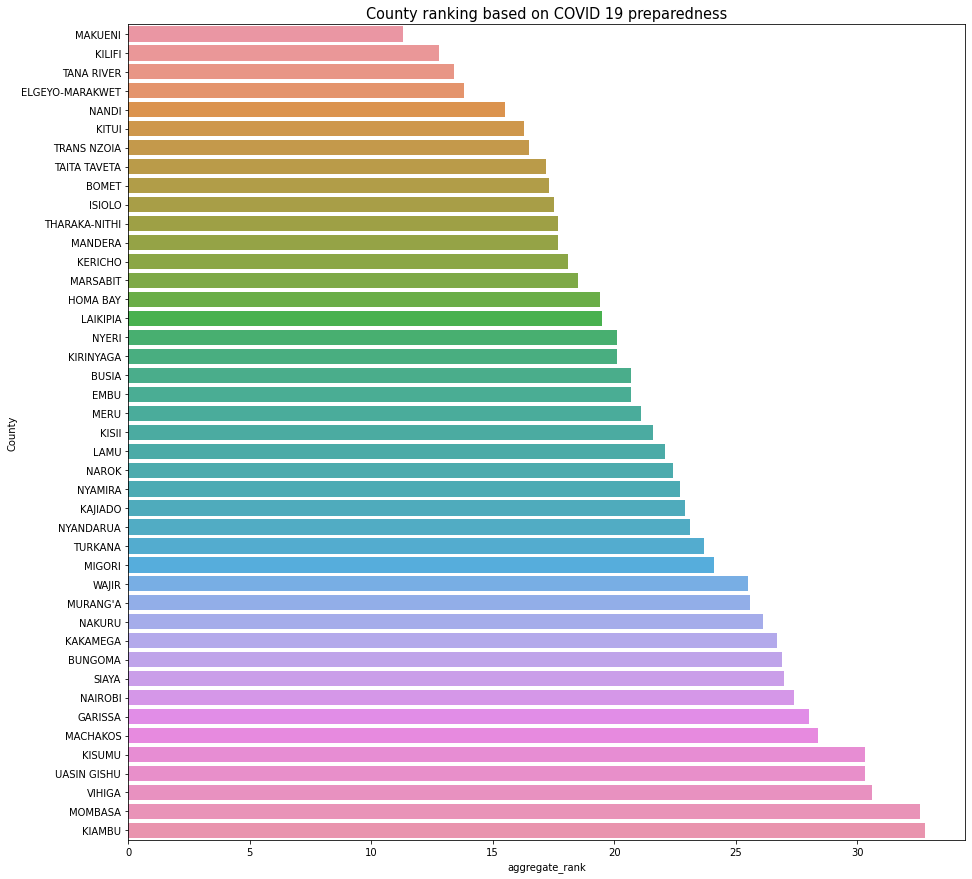

In [ ]:
from google.colab import files

# Order counties by aggregate ranking
plt.figure(figsize=(15,15))
plt.title('County ranking based on COVID 19 preparedness', fontdict={'fontsize': 14.5})
sns.barplot(x = county_ranking['aggregate_rank'], y = county_ranking['County'], palette=None)

In [ ]:
# Get top 5 prepared counties
best_prepared_counties = county_ranking['County'].head(5).reset_index()
best_prepared_counties.drop(['index'], axis=1, inplace=True)
best_prepared_counties

,County
0,MAKUENI
1,KILIFI
2,TANA RIVER
3,ELGEYO-MARAKWET
4,NANDI


In [ ]:
# Get top 5 worst prepared counties
worst_prepared_counties = county_ranking['County'].tail().reset_index().sort_index(ascending=False)
worst_prepared_counties.drop(['index'], axis=1,inplace=True)
worst_prepared_counties

,County
4,KIAMBU
3,MOMBASA
2,VIHIGA
1,UASIN GISHU
0,KISUMU


In [ ]:
# Among worst prepared counties, which county has the lowest bed to population ratio?
ratio_df = final_df[final_df['County'].isin(worst_prepared_counties['County'].to_list())]
ratio_df = ratio_df[['bed_pop_ratio','bed_preparedness','County']]
ratio_df.rename(columns={'bed_preparedness':'bed_deficit'}, inplace= True)
ratio_df['bed_pop_ratio x (10^-5)'] = ratio_df['bed_pop_ratio'] * 100000
ratio_df.sort_values(by=['bed_pop_ratio','bed_deficit'])

,bed_pop_ratio,bed_deficit,County,bed_pop_ratio x (10^-5)
28,0.000010,34.0,VIHIGA,1.016927
4,0.000014,86.0,KIAMBU,1.406275
18,0.000017,50.0,KISUMU,1.730742
1,0.000021,65.0,MOMBASA,2.068966
8,0.000032,83.0,UASIN GISHU,3.180919


Vihiga has the lowest bed to population ratio with a deficit of 34 beds

In [ ]:
# Which county has the lowest bed to population ratio overall?
final_df[final_df['bed_pop_ratio'] == final_df['bed_pop_ratio'].min()]['County']

25    MERU
Name: County, dtype: object

In [ ]:
# Among worst prepared counties which county has the highest density?
density_df = final_df[final_df['County'].isin(worst_prepared_counties['County'].to_list())]
density_df[density_df['Density'] == density_df['Density'].max()]['County']

1    MOMBASA
Name: County, dtype: object

In [ ]:
# least five prepared counties in terms of isolating beds to COVID 19
final_df.sort_values(by=['bed_preparedness'], ascending=False).head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank,bed_pop_ratio,hospital_count_rank,cases_rank,density_rank,bed_pop_ratio_rank,aggregate_rank
0,NAIROBI,8618.0,196.0,4397073,"2,192,452","2,204,376",6247,170,582.0,716.0,134.0,43.0,0.000132,7.0,43.0,43.0,1.0,27.4
4,KIAMBU,907.0,37.5,2417735,"1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0,0.000014,9.0,41.0,39.0,33.0,32.8
8,UASIN GISHU,180.0,15.5,1163186,"580,269","582,889",342,77,37.0,120.0,83.0,41.0,0.000032,30.5,35.0,25.0,20.0,30.3
1,MOMBASA,1870.0,154.8,1208333,"610,257","598,046",5495,129,25.0,90.0,65.0,40.0,0.000021,12.0,42.0,42.0,27.0,32.6
34,KAKAMEGA,14.0,0.7,1867579,"897,133","970,406",619,217,14.0,70.0,56.0,39.0,0.000007,1.0,15.5,37.0,41.0,26.7


# RECOMMENDATION

1) The least five prepared counties in terms of isolating beds to COVID 19 patients are:
- Nairobi
- Kiambu
- Uasin Gishu
- Mombasa
- Kakamega

**Recommendation**: They should consider allocating more beds capacity in preparation to the rise of COVID 19 cases

2) The most prepared counties in relation to COVID 19 are:
- Makueni
- Kilifi
- Tana River
- Elgeyo Marakwet 
- Nandi 

We arrived at this by ranking counties based on bed to population ratio, number of cumulative cases, number of health facilites, isolation bed deficit from recommended, density [number of people per sq km]


3) The least five prepared counties to tackle the COVID 19 epidamic are:
- KIAMBU
- MOMBASA
- VIHIGA
- UASIN GISHU
- KISUMU
 
**Recommendation**: They should consider improving their preparedness by increasing COVID 19 isolations beds in line to their respectiful populations.
Also enforcing stricter social distancing measures.

4) Among the least five prepared counties, Mombasa has the highest density thus stricter social distancing measures should  be put in place.

5) Among all counties, Meru has the lowest bed to population ratio, they should consider improving their preparedness by increasing COVID 19 isolations beds.

N/B The data were used is dynamic as counties are putting more isolation beds to COVID 19 patients and the number of confirmed cases are rising drastically across the country.